In [1]:
# Import the libraries we need for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice visual style for our plots
sns.set_style('whitegrid')

# Load the dataset. Make sure it's in the same folder as your notebook.
df = pd.read_csv('listings.csv.gz')

# Display the first 5 rows to confirm it loaded correctly
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40824219,https://www.airbnb.com/rooms/40824219,20251001171547,2025-10-02,city scrape,Room close to Manhattan for FEMALE guests,This cozy spacious room includes a twin size b...,Sunnyside is a safe residental area. <br />The...,https://a0.muscache.com/pictures/hosting/Hosti...,317540555,...,4.88,4.94,4.69,NaN,f,3,0,3,0,0.23
1,40833186,https://www.airbnb.com/rooms/40833186,20251001171547,2025-10-02,previous scrape,Soho LES East village private room downtown,NaN,NaN,https://a0.muscache.com/pictures/1f093bbc-936c...,68718914,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
2,40837137,https://www.airbnb.com/rooms/40837137,20251001171547,2025-10-02,previous scrape,Sunset Park - Quiet and close to subway!,"Cozy, lovely bedroom with a comfortable full s...",the sunset park of Brooklyn,https://a0.muscache.com/pictures/01c4e91e-4012...,317770098,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.01
3,40838018,https://www.airbnb.com/rooms/40838018,20251001171547,2025-10-02,previous scrape,Cozy One Bedroom in Clinton Hill,This sunny one-bedroom apartment is located in...,Clinton Hill is one of the best neighborhoods ...,https://a0.muscache.com/pictures/9322d54a-6eb7...,17211451,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.01
4,40839416,https://www.airbnb.com/rooms/40839416,20251001171547,2025-10-02,city scrape,🪴XL dojo 🌾 shared green yogi palace apt 🌿,"New York City living at its best. A massive, c...",Live like the Ramones > The East Village is st...,https://a0.muscache.com/pictures/hosting/Hosti...,4765305,...,5.00,5.00,4.95,NaN,f,8,0,8,0,0.40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36111 entries, 0 to 36110
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36111 non-null  int64  
 1   listing_url                                   36111 non-null  object 
 2   scrape_id                                     36111 non-null  int64  
 3   last_scraped                                  36111 non-null  object 
 4   source                                        36111 non-null  object 
 5   name                                          36109 non-null  object 
 6   description                                   35153 non-null  object 
 7   neighborhood_overview                         18704 non-null  object 
 8   picture_url                                   36111 non-null  object 
 9   host_id                                       36111 non-null 

In [3]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.611100e+04,3.611100e+04,3.611100e+04,34944.000000,34944.000000,36111.000000,36111.000000,36111.000000,21700.000000,30162.000000,...,24922.000000,24909.000000,24917.000000,24907.000000,24907.000000,36111.000000,36111.000000,36111.000000,36111.000000,24923.000000
mean,4.667906e+17,2.025100e+13,1.756195e+08,112.264652,194.007068,40.728253,-73.947350,2.733239,1.192788,1.386016,...,4.655356,4.833791,4.821406,4.743204,4.634118,67.455152,48.661793,17.957824,0.052532,0.821178
std,5.448721e+17,1.441426e+00,1.945624e+08,592.417347,900.407345,0.056269,0.054995,1.866400,0.548018,0.944931,...,0.510746,0.384702,0.425933,0.399600,0.504016,215.678813,204.537592,79.015677,0.775728,1.916104
min,2.595000e+03,2.025100e+13,1.678000e+03,1.000000,1.000000,40.500366,-74.251907,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.159416e+07,2.025100e+13,1.795864e+07,1.000000,1.000000,40.688260,-73.983560,2.000000,1.000000,1.000000,...,4.540000,4.820000,4.820000,4.660000,4.520000,1.000000,0.000000,0.000000,0.000000,0.070000
50%,5.095308e+07,2.025100e+13,8.832602e+07,2.000000,3.000000,40.725960,-73.955000,2.000000,1.000000,1.000000,...,4.810000,4.950000,4.960000,4.860000,4.760000,2.000000,1.000000,1.000000,0.000000,0.250000
75%,9.747695e+17,2.025100e+13,3.107737e+08,8.000000,12.000000,40.762120,-73.928118,4.000000,1.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.940000,9.000000,2.000000,2.000000,0.000000,0.900000
max,1.521848e+18,2.025100e+13,7.214431e+08,5478.000000,9764.000000,40.912017,-73.711822,16.000000,15.500000,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1148.000000,1148.000000,567.000000,20.000000,122.760000


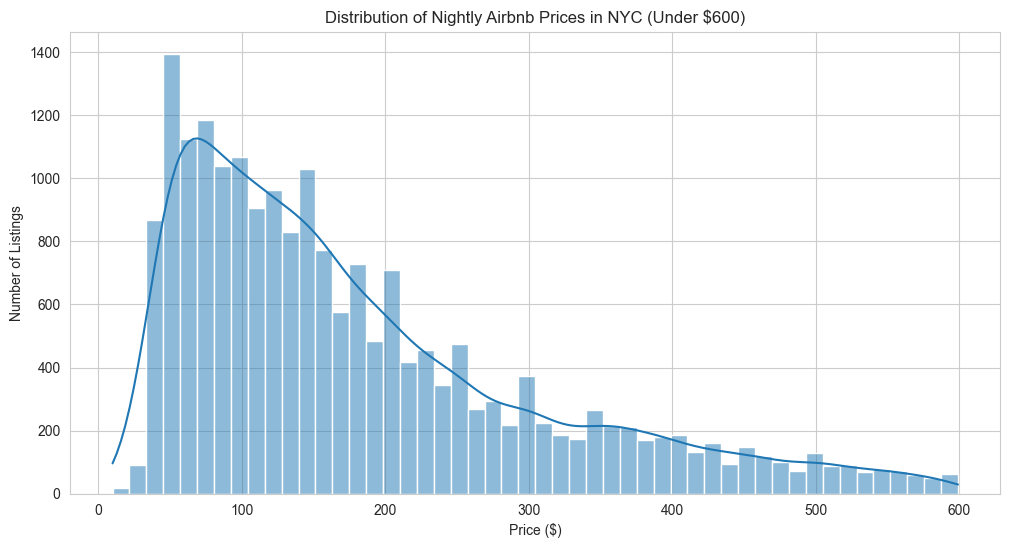

In [4]:
# The 'price' column might not be a number, let's check its type
# If it's 'object', we need to clean it
if df['price'].dtype == 'object':
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Let's plot the price distribution for listings under $600 to see the common range
plt.figure(figsize=(12, 6))
sns.histplot(df[df['price'] < 600]['price'], bins=50, kde=True)
plt.title('Distribution of Nightly Airbnb Prices in NYC (Under $600)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.show()

In [5]:
print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

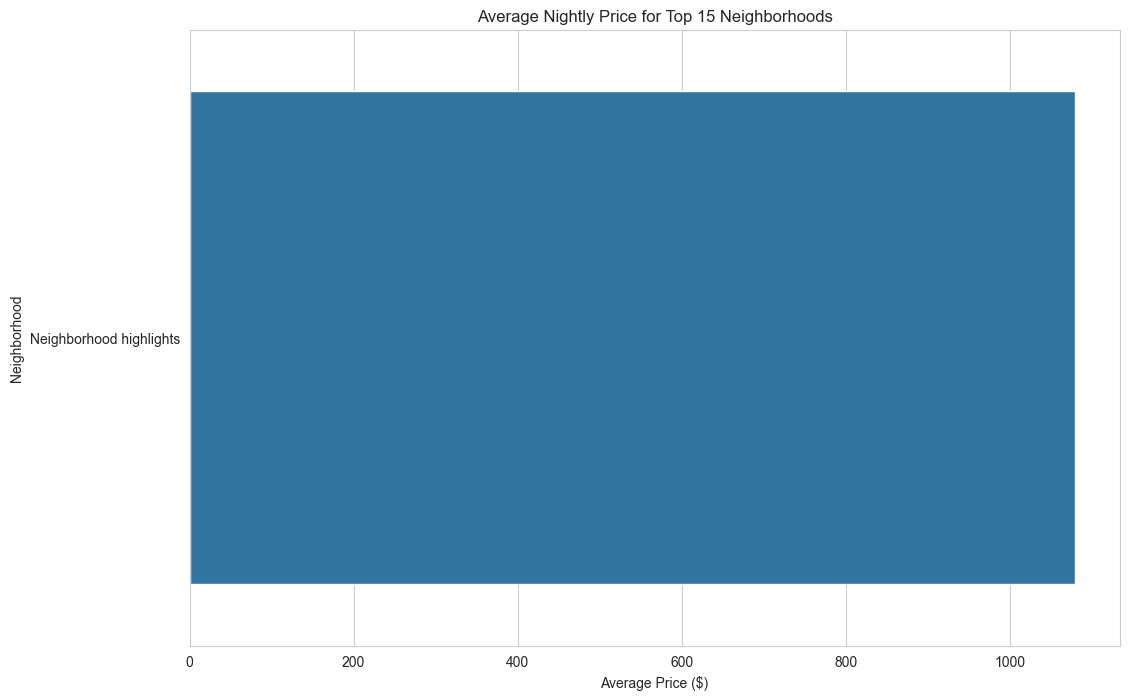

In [6]:
# --- CORRECTED CODE FOR QUESTION 2 ---

# We'll use 'neighbourhood' which is the correct column name.
# We'll calculate the average price for the top 15 most common neighborhoods to keep the chart readable.
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(15).index
df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods)]

# Now group by those top neighborhoods and calculate the average price
avg_price_by_neighbourhood = df_top_neighbourhoods.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_neighbourhood.values, y=avg_price_by_neighbourhood.index, orient='h')
plt.title('Average Nightly Price for Top 15 Neighborhoods')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.show()

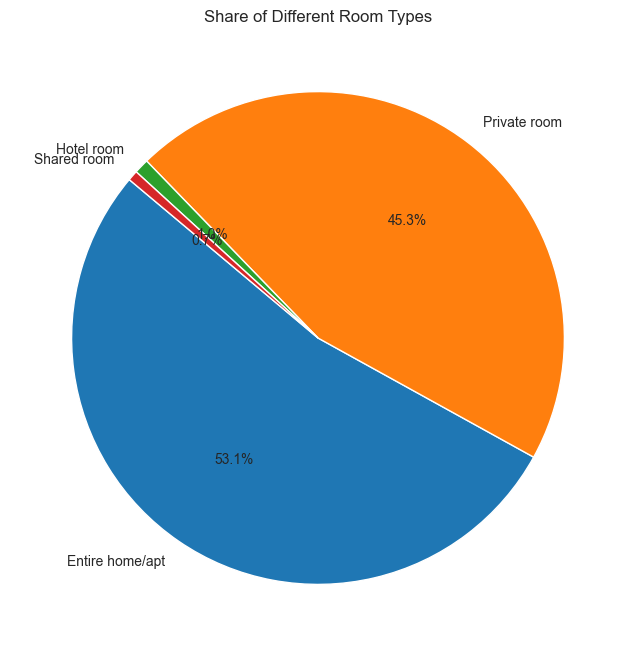

In [7]:
plt.figure(figsize=(8, 8))
df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Share of Different Room Types')
plt.ylabel('') # Hides the label on the side, making it look cleaner
plt.show()

In [20]:
# We select the columns that we believe will be most predictive of price.
columns_to_keep = [
    'neighbourhood',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

# Create a new, smaller DataFrame with only these columns.
# The .copy() prevents a common warning in pandas.
df_clean = df[columns_to_keep].copy()

# Let's check the first few rows of our new DataFrame
df_clean.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Neighborhood highlights,40.74698,-73.91763,Private room,66.0,30,16,0.23,3,77
1,NaN,40.72314,-73.99323,Private room,NaN,30,0,NaN,1,0
2,Neighborhood highlights,40.64607,-74.00552,Private room,NaN,30,1,0.01,1,0
3,Neighborhood highlights,40.68370,-73.96115,Entire home/apt,NaN,90,1,0.01,1,0
4,Neighborhood highlights,40.72147,-73.98270,Private room,76.0,30,20,0.40,8,168


In [21]:
# --- CORRECTED CODE FOR STEP 2 ---

# Check for missing values in our new smaller DataFrame.
print("Missing values BEFORE cleaning:")
print(df_clean.isnull().sum())

# Fill missing 'reviews_per_month' and assign it back to the column.
# This is the recommended way and avoids the warning.
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)

print("\nMissing values AFTER cleaning:")
print(df_clean.isnull().sum())

Missing values BEFORE cleaning:
neighbourhood                     17406
latitude                              0
longitude                             0
room_type                             0
price                             14783
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 11188
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values AFTER cleaning:
neighbourhood                     17406
latitude                              0
longitude                             0
room_type                             0
price                             14783
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [22]:
# Use pandas to create dummy variables for our categorical columns.
# This converts columns like 'room_type' into numerical columns.
# drop_first=True is a good practice to avoid redundant columns.
df_model_ready = pd.get_dummies(df_clean, columns=['neighbourhood', 'room_type'], drop_first=True)

# Let's look at the result. Scroll to the right to see the new columns.
print("Shape of our final DataFrame:", df_model_ready.shape)
df_model_ready.head()

Shape of our final DataFrame: (36111, 11)


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,40.74698,-73.91763,66.0,30,16,0.23,3,77,False,True,False
1,40.72314,-73.99323,NaN,30,0,0.00,1,0,False,True,False
2,40.64607,-74.00552,NaN,30,1,0.01,1,0,False,True,False
3,40.68370,-73.96115,NaN,90,1,0.01,1,0,False,False,False
4,40.72147,-73.98270,76.0,30,20,0.40,8,168,False,True,False


In [23]:
# Check for missing values BEFORE the final cleaning step.
print("Missing values before dropping rows:")
print(df_model_ready.isnull().sum())

# Drop rows where the 'price' column has a missing value.
# The 'subset' parameter tells pandas to only look in the 'price' column.
df_model_ready.dropna(subset=['price'], inplace=True)

# Verify that all missing values are now gone.
print("\nMissing values AFTER dropping rows:")
print(df_model_ready.isnull().sum())

Missing values before dropping rows:
latitude                              0
longitude                             0
price                             14783
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
room_type_Hotel room                  0
room_type_Private room                0
room_type_Shared room                 0
dtype: int64

Missing values AFTER dropping rows:
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
room_type_Hotel room              0
room_type_Private room            0
room_type_Shared room             0
dtype: int64


In [24]:
# --- FINAL DATA PREPARATION BLOCK ---

# Step 1: Drop any remaining rows with missing price or neighbourhood data
df_clean.dropna(subset=['price', 'neighbourhood'], inplace=True)

# Step 2: Perform One-Hot Encoding on the cleaned data
# We only encode room_type to keep the model simple and fast
df_model_ready = pd.get_dummies(df_clean, columns=['room_type'], drop_first=True)

# Step 3: Remove the extreme price outliers to get a better model
price_cap = df_model_ready['price'].quantile(0.99)
df_filtered = df_model_ready[df_model_ready['price'] < price_cap].copy()

# Note: We are now dropping the 'neighbourhood' text column as it's not needed for the model
df_filtered.drop('neighbourhood', axis=1, inplace=True)


print("SUCCESS: The 'df_filtered' DataFrame has been created and is ready for modeling!")
print(f"Shape of the final data for the model: {df_filtered.shape}")

SUCCESS: The 'df_filtered' DataFrame has been created and is ready for modeling!
Shape of the final data for the model: (10774, 11)


In [25]:
# --- PHASE 4 (UPGRADED MODEL) ---

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # <-- We import the new model here
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Define X and y (using the same filtered DataFrame)
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the NEW RandomForestRegressor model
# n_estimators=100 means it will build 100 decision trees.
# n_jobs=-1 uses all your computer's CPU cores to make it faster.
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print("Training the Random Forest model... (This may take a minute or two)")
model_rf.fit(X_train, y_train)
print("Training complete!")

# Step 4: Make predictions and evaluate the performance
y_pred_rf = model_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- FINAL Model Performance (Random Forest) ---")
print(f"Root Mean Squared Error (RMSE): ${rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")

Training the Random Forest model... (This may take a minute or two)
Training complete!

--- FINAL Model Performance (Random Forest) ---
Root Mean Squared Error (RMSE): $1999.60
R-squared (R²): 0.78


In [ ]:
# Save our cleaned DataFrame (from Phase 3) to a new CSV file.
# This file will be used as the data source for our powerbi dashboard.
df_clean.to_csv('airbnb_for_powerbi.csv', index=False)

print("File 'airbnb_for_powerbi.csv' has been created successfully!")

Top 10 Most Important Features for Predicting Price:
                          feature  importance
7            room_type_Hotel room    0.601281
6                availability_365    0.133789
3               number_of_reviews    0.083917
1                       longitude    0.063851
4               reviews_per_month    0.045910
5  calculated_host_listings_count    0.032174
0                        latitude    0.022547
2                  minimum_nights    0.013903
8          room_type_Private room    0.002606
9           room_type_Shared room    0.000022


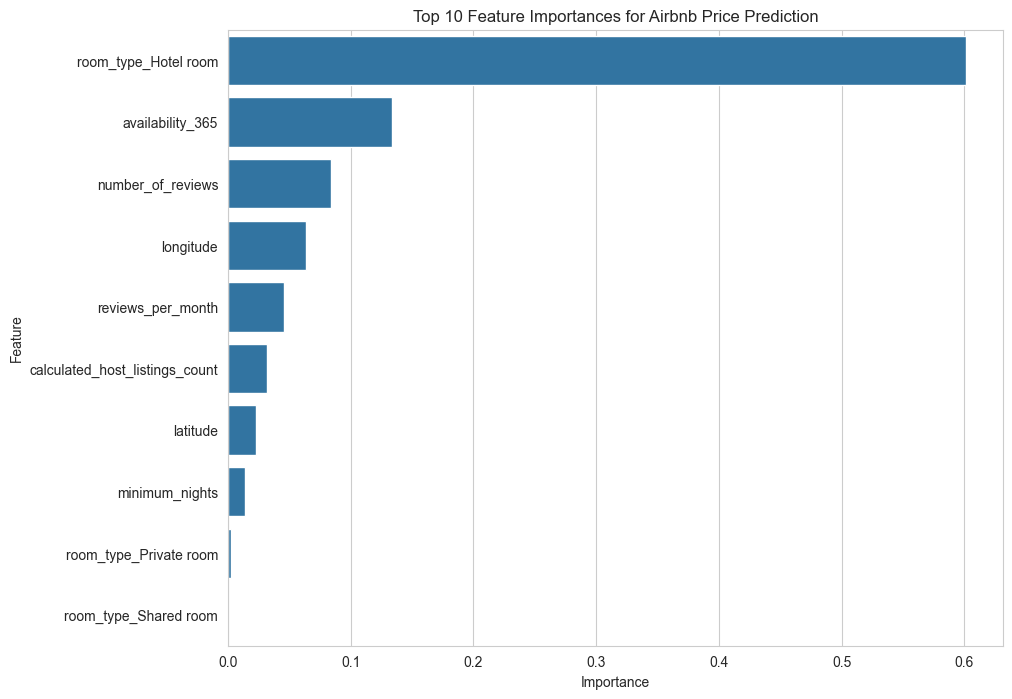

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature importances from our trained Random Forest model
importances = model_rf.feature_importances_

# Create a DataFrame to view them easily
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features for Predicting Price:")
print(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances for Airbnb Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()